In [1]:
import numpy as np 
import pandas as pd 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.io import loadmat
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# from tsne import bh_sne
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Load data

In [21]:
data = pd.read_csv("./data/data.csv")
df = pd.read_csv("./data/data.csv") 

NUM_CLUSTERS = 20

df['binary_order'] = (df['track_number']-1)%NUM_CLUSTERS # average number of tracks / album
# order = data['track_number']/data['total_tracks']


track_labels = df['binary_order']
# album_labels = pd.to_numeric(data['album_title'], errors='coerce')

columns_to_remove = ['Unnamed: 0',
                    'id',
                    'track_title',
                    'album_title',
                    'album_artist',
                    'track_number',
                    'total_tracks',
                    'order',
                    'binary_order',
                    'key',
                    'mode',
                    'duration_ms',
                    'time_signature']
                  


df.drop(columns = columns_to_remove, axis = 1, inplace = True)

        # Danceability, Energy, Loudness, Speechiness, Acousticness, 
        # Instrumentalness, Liveness, Valence, Tempo, Track Number/Total Albums



from sklearn.preprocessing import MinMaxScaler
segmentColumnsToNormalise = ['loudness','tempo']
df[segmentColumnsToNormalise] = MinMaxScaler().fit_transform(df[segmentColumnsToNormalise])

# data['label']=labels
# print(data['label'].unique())
data['album_title'] = pd.Categorical(data['album_title'])
album_labels = data['album_title'].cat.codes
album_labels


0       113
1       113
2       113
3       113
4       113
       ... 
4955    184
4956    184
4957    184
4958    184
4959    184
Length: 4960, dtype: int16

### Uncomment the relevant code lines below and execute to print more description about the data

In [121]:
data.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'label'],
      dtype='object')

In [122]:
# MNIST dataset has ten digits. 

print(data['label'].unique())

[0 1 2 3 4 5 6 7 8 9]


# Plotting Functions

In [36]:
def scatter2d(X, y):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.scatter(X[:,0], X[:,1], c=y)
    
    # palette = sns.color_palette("hls", len(np.unique(y)))
    # for i in range(len(y)):
    #     ax.text(X[i,0], X[i,1], y[i], color=palette[y[i]-1], fontsize='small')
        
def scatter3d(X, y):
    import plotly.express as px
    fig = px.scatter_3d(X, x=X[:,0], y=X[:,1], z=X[:,2],
              color=y)
    fig.show()
    # palette = sns.color_palette("hls", len(np.unique(y)))
    # for i in range(len(y)):
    #     ax.text(X[i,0], X[i,1], X[i,2], y[i], color=palette[y[i]-1], fontsize='small')

In [13]:
pca = PCA(n_components=3, svd_solver='full')
X_pca = pca.fit_transform(df)

In [14]:
tsne = TSNE(n_components=2, perplexity=50)
X_tsne = tsne.fit_transform(df)

C:\Users\crisp\anaconda3\envs\AI_general\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\crisp\anaconda3\envs\AI_general\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


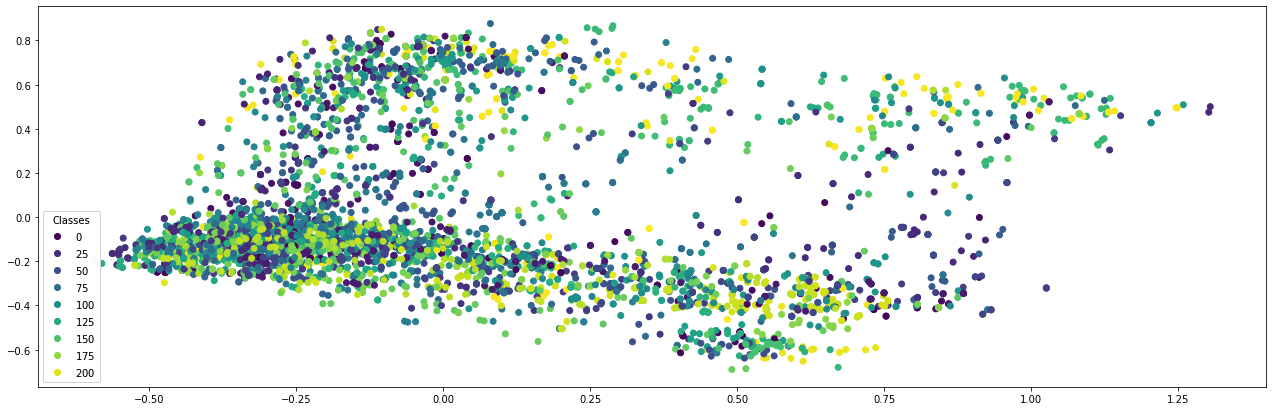

In [26]:
f, axes = plt.subplots(figsize=[22,7])
pca_scatter = axes.scatter(X_pca[:,0], X_pca[:,1], c=album_labels)
legend1 = axes.legend(*pca_scatter.legend_elements(),
                    loc="lower left", title="Classes")
axes.add_artist(legend1)

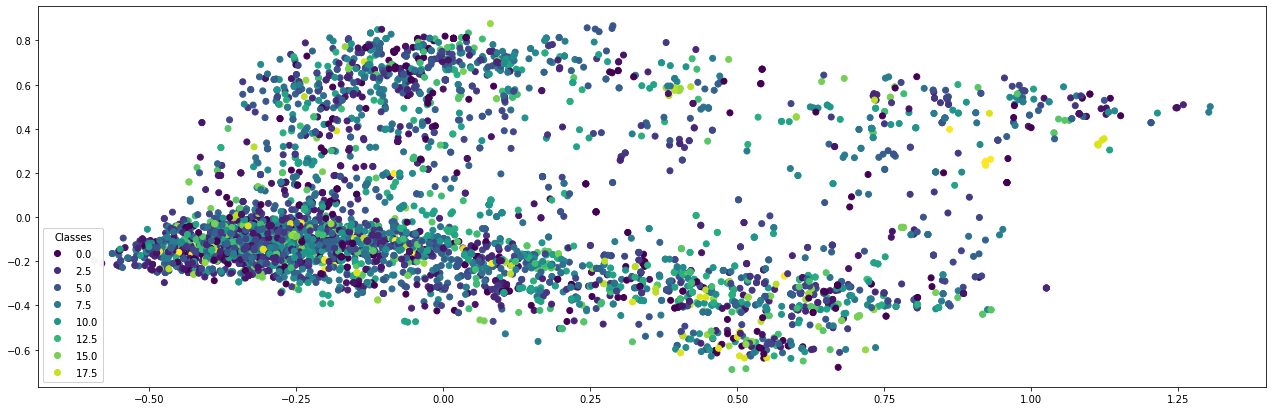

In [27]:
f, axes = plt.subplots(figsize=[22,7])
pca_scatter = axes.scatter(X_pca[:,0], X_pca[:,1], c=track_labels)
legend1 = axes.legend(*pca_scatter.legend_elements(),
                    loc="lower left", title="Classes")
axes.add_artist(legend1)

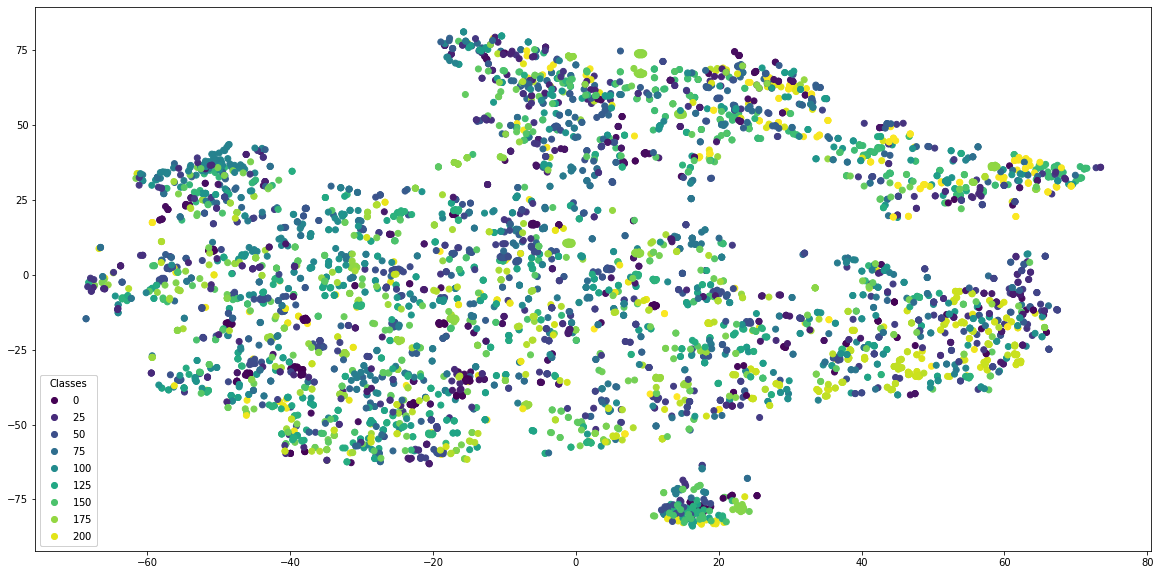

In [28]:
f, axes = plt.subplots(figsize=[20,10])
tsne_scatter = axes.scatter(X_tsne[:,0], X_tsne[:,1], c=album_labels)
legend1 = axes.legend(*tsne_scatter.legend_elements(),
                    loc="lower left", title="Classes")
axes.add_artist(legend1)

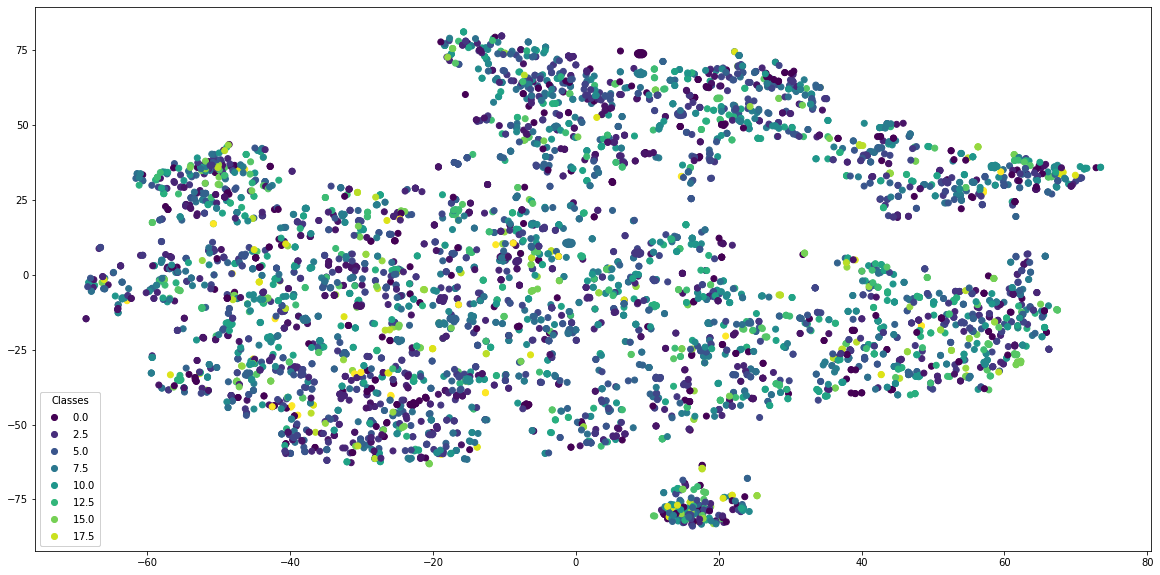

In [29]:
f, axes = plt.subplots(figsize=[20,10])
tsne_scatter = axes.scatter(X_tsne[:,0], X_tsne[:,1], c=track_labels)
legend1 = axes.legend(*tsne_scatter.legend_elements(),
                    loc="lower left", title="Classes")
axes.add_artist(legend1)

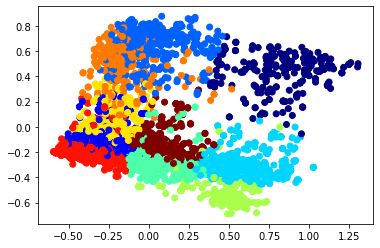

In [224]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_pca)
y_labels = kmeans.labels_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_labels)

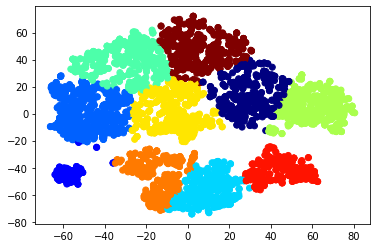

In [228]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_tsne)
y_labels = kmeans.labels_
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y_labels)

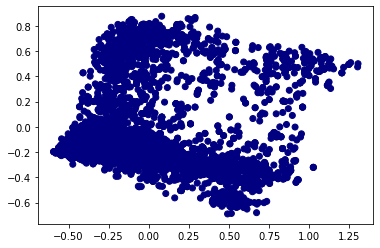

In [227]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=4).fit(X_pca)
cluster_assignments = dbscan.labels_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = cluster_assignments)

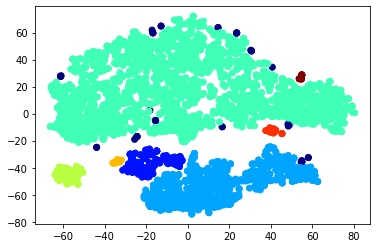

In [229]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4, min_samples=10).fit(X_tsne)
cluster_assignments = dbscan.labels_
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = cluster_assignments)

In [183]:
np.save('tsne.npy', X_tsne)

### To getter a better understanding of interaction of the dimensions plot the first three PCA dimensions

In [37]:
###
#Your code here. Try PCA with three components
###


y = track_labels
# y = y.map({'Iris-setosa' : 0, 'Iris-virginica' : 1, 'Iris-versicolor':2})

pca = PCA(n_components=3, svd_solver='full')
X_r = pca.fit_transform(df)

scatter3d(X_r, y)